In [6]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import scipy.stats
import seaborn.apionly as sns

SHORTEN = {
    "Artery-Aorta":"Artery.A"     ,
    "Artery-Tibial": "Artery.T",
    "Adipose-Subcutaneous": "Adipose.S",    
    "Adipose-Visceral":"Adipose.V",
    "Brain-Caudate":"Caudate"   , 
    "Brain-Cerebellum":"Cerebellum",
    "Cells-Transformedfibroblasts": "Fibroblast",
    "Esophagus-Mucosa": "Mucosa E.",
    "Esophagus-Muscularis":"Muscularis E.",
    "Heart-LeftVentricle":"Ventricule",
    "Lung": "Lung",
    "Muscle-Skeletal": "Muscle",
    "Nerve-Tibial":"Nerve Tibial",
    "Skin-NotSunExposed": "Skin Unexposed",
    "Skin-SunExposed":"Skin Leg",
    "Thyroid":"Thyroid",
    "WholeBlood": "Blood"
}
COLORS = {
    "Artery-Aorta":"salmon",
    "Artery-Tibial": "red",
    "Adipose-Subcutaneous": "darkorange",    
    "Adipose-Visceral":"orange",
    "Brain-Caudate":"lemonchiffon"   , 
    "Brain-Cerebellum":"yellow",
    "Cells-Transformedfibroblasts": "skyblue",
    "Esophagus-Mucosa": "sienna",
    "Esophagus-Muscularis":"burlywood",
    "Heart-LeftVentricle":"darkviolet",
    "Lung": "greenyellow",
    "Muscle-Skeletal": "mediumslateblue",
    "Nerve-Tibial":"gold",
    "Skin-NotSunExposed":"blue",
    "Skin-SunExposed":"cornflowerblue",
    "Thyroid":"green",
    "WholeBlood": "m",
    "permuted": "gray"
}

TFs = ['ZSCAN29', 'NFYB', 'IRF5', 'H4K20me1', 'H3K79me2', 'GABPA', 'ETV6', 'ESRRA', 'BHLHE40', 'TBP', 'BRCA1', 'CTCF', 'CBX5', 'NFXL1', 'IKZF2', 'EED', 'SKIL', 'H3K4me2', 'ZBED1', 'NR2C1', 'TBX21', 'POLR2A', 'RAD21', 'H3K4me1', 'MAZ', 'PKNOX1', 'POLR2AphosphoS2', 'ZNF592', 'MXI1', 'ASH2L', 'USF1', 'NRF1', 'E2F4', 'JUND', 'RAD51', 'BATF', 'IKZF1', 'SIN3A', 'MAX', 'CHD2', 'ZNF217', 'RCOR1', 'MYB', 'MYC', 'TCF12', 'TBL1XR1', 'ATF7', 'EP300', 'EGR1', 'MEF2C', 'MAFK', 'BCLAF1', 'CHD1', 'NFIC', 'HCFC1', 'H3K36me3', 'ZNF384', 'JUNB', 'RFX5', 'ELK1', 'SMAD5', 'ZBTB40', 'H3K27me3', 'MLLT1', 'CREM', 'BACH1', 'CUX1', 'SMC3', 'EBF1', 'CBFB', 'ARID3A', 'BMI1', 'H3K9ac', 'STAT3', 'SMARCA5', 'CHD7', 'ZNF24', 'SP1', 'HDGF', 'WRNIP1', 'FOXK2', 'NR2F1', 'TARDBP', 'NFYA', 'H3K4me3', 'RELB', 'ELF1', 'GATAD2B', 'ATF2', 'STAT1', 'TCF7', 'H3K27ac', 'DPF2', 'USF2', 'H2AFZ', 'SPI1', 'RB1', 'ZEB1', 'ZNF687', 'RUNX3', 'MTA2', 'TRIM22', 'TAF1', 'BCL11A', 'IRF3', 'ZNF143', 'NBN', 'ZNF207', 'MTA3', 'POLR2AphosphoS5', 'HSF1', 'KDM5A', 'YBX1']
Tissues =[]
eSTRs = []
eSTRsll =[]
causal = []
topstr = []
causalestr = []
sample = []
anova = []
for T in sorted(SHORTEN.keys()):
    #print(T)
    summary = pd.read_csv('/storage/szfeupe/Runs/650GTEx_estr/Analysis_by_Tissue/'+T+'/Master.table', sep='\t')
    coor = pd.read_csv('/storage/szfeupe/Runs/650GTEx_estr/Analysis_by_Tissue/'+T+'/Corr_Expr.csv')
    sample.append(coor.shape[0])
    Tissues.append(' '.join(T.split('-')))
    eSTRs.append(summary.loc[summary['qvalue']<0.1].shape[0])
    eSTRsll.append(summary.loc[summary['llqvalue']<0.1].shape[0])
    causal.append(summary.loc[summary['caviar.score']>0.5].shape[0])
    summary['top.variant'] = summary['top.variant'].astype(str)
    summary['top'] = summary['top.variant'].apply(lambda x: 1 if "STR" in x else 0)
    topstr.append(summary.loc[summary['top']==1].shape[0])
    causalestr.append(summary.loc[(summary['qvalue']<0.1) & (summary['top']==1)].shape[0])
    anova.append(summary.loc[(summary['anova_pval']<=0.05)&(summary['delta_aic']>0)&(summary['significant']==1)].shape[0])

In [9]:
Table=pd.DataFrame({"Tissue":Tissues,"Sample size":sample ,"Gene Level eSTRs":eSTRs, "Locus Level eSTRs":eSTRsll, "AnovaeSTR":anova,"Causal.STRs":causal, "top.str":topstr, "causal.estr":causalestr} )
Table['id']= sorted(SHORTEN.keys())
#Table['num.best.caviar'] = Table['id'].apply(lambda x: list(eSTR["best.tissue"]).count(x))
Table['col'] = Table['id'].apply(lambda x: COLORS[x])
Table = Table[["Tissue", "Sample size","Gene Level eSTRs","Locus Level eSTRs","AnovaeSTR","Causal.STRs","top.str","causal.estr","id", "col"]].sort_values("Gene Level eSTRs", ascending=False)
Table['percent'] = Table['causal.estr']*100/Table['Gene Level eSTRs']
Table['highcau'] = Table['Causal.STRs']*100/Table['causal.estr']
Table

,Tissue,Sample size,Gene Level eSTRs,Locus Level eSTRs,AnovaeSTR,Causal.STRs,top.str,causal.estr,id,col,percent,highcau
12,Nerve Tibial,265,2191,5583,773,12,4877,170,Nerve-Tibial,gold,7.759014,7.058824
15,Thyroid,262,2034,5111,711,10,5253,164,Thyroid,green,8.062930,6.097561
14,Skin SunExposed,297,1955,5043,617,9,5109,180,Skin-SunExposed,cornflowerblue,9.207161,5.000000
0,Adipose Subcutaneous,270,1789,4517,589,12,5589,178,Adipose-Subcutaneous,darkorange,9.949693,6.741573
3,Artery Tibial,276,1689,4064,611,9,4990,170,Artery-Tibial,red,10.065127,5.294118
7,Esophagus Mucosa,255,1687,4397,565,9,5658,157,Esophagus-Mucosa,sienna,9.306461,5.732484
11,Muscle Skeletal,343,1665,4156,554,10,5273,150,Muscle-Skeletal,mediumslateblue,9.009009,6.666667
6,Cells Transformedfibroblasts,225,1518,3566,507,12,5361,162,Cells-Transformedfibroblasts,skyblue,10.671937,7.407407
10,Lung,259,1413,3457,450,10,5490,149,Lung,greenyellow,10.544940,6.711409
8,Esophagus Muscularis,214,1374,3312,476,6,5421,155,Esophagus-Muscularis,burlywood,11.280932,3.870968


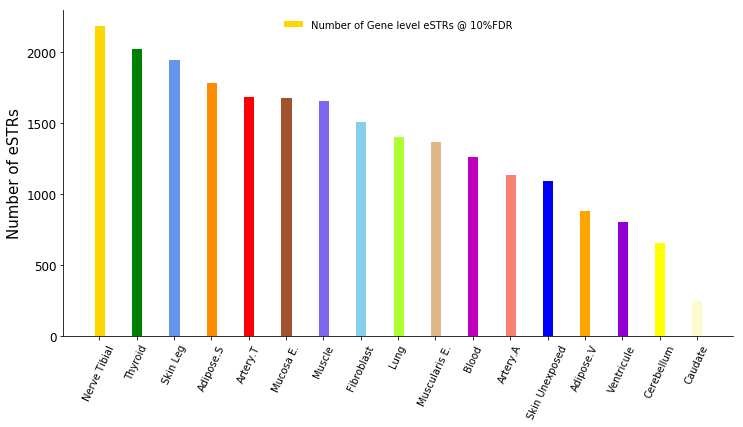

In [36]:
xvals = np.array(range(len(Tissues)))
w=0.3
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
bars1 = ax.bar(xvals, Table["Gene Level eSTRs"], color=list(Table['col']), edgecolor="white", width=w, label="Number of Gene level eSTRs @ 10%FDR")
#bars2 = ax.bar(xvals+w, Table["Locus Level eSTRs"], color="gray", edgecolor="white", width=w, label="Number of Locus level eSTRs @ 10%FDR")
ax.set_xticks(xvals)
ax.set_xticklabels([SHORTEN[x] for x in Table["id"]], size=10, rotation=65);
ax.set_ylabel("Number of eSTRs", size=15)
ax.set_yticklabels([int(x) for x in ax.get_yticks()], size=12);
ax.legend(loc="upper center", frameon=False);
plt.show()

In [11]:
Table['percent_anova'] = Table['AnovaeSTR']*100/Table['Gene Level eSTRs']
Table[["Tissue", "Sample size","Gene Level eSTRs","causal.estr","percent_anova"]].sort_values('Sample size', ascending=False)
sum(Table['percent_anova'])/17

32.07204087918386

In [5]:
summary.loc[(summary['anova_pval']<=0.05)&(summary['delta_aic']>0)&(summary['significant']==1)]  #1244     #lower aic the better  snp - (str+snp)

,gene,chrom,str.start,str.id,best.str,best.str.start,top.variant,caviar.score,beta,beta.se,...,delta_bic,delta_aic,anova_pval,estr_fdr,esnp_fdr,llsignificant,significant,gene.name,str.end,top
222,ENSG00000054282.11,chr1,243394402,STR_243394402,1,243394402.0,SNP_243434927,4.498930e-07,-0.405585,0.053861,...,1.219555,4.889436,9.083572e-03,0.001579,0.000829,1,1,SDCCAG8,243394412,0
246,ENSG00000057252.8,chr1,179317896,STR_179317896,1,179317896.0,SNP_179320279,9.132490e-08,-0.260078,0.057705,...,0.235894,3.877801,1.598179e-02,0.001680,0.000829,1,1,SOAT1,179317950,0
487,ENSG00000083444.12,chr1,11987693,STR_11987693,1,11987693.0,SNP_12046880,1.175420e-11,0.246114,0.057514,...,2.883969,6.539961,3.679655e-03,0.002378,0.000829,1,1,PLOD1,11987733,0
607,ENSG00000094975.9,chr1,172575420,STR_172575420,1,172575420.0,SNP_172633975,1.319130e-02,0.201102,0.058857,...,-0.908270,2.726519,3.073941e-02,0.029112,0.206198,1,1,SUCO,172575433,0
614,ENSG00000097046.8,chr1,91934083,STR_91934083,1,91934083.0,SNP_91967142,3.747910e-02,-0.254346,0.053729,...,8.369419,12.156316,1.823808e-04,0.001579,0.009479,1,1,CDC7,91934104,0
798,ENSG00000116688.12,chr1,11987693,STR_11987693,1,11987693.0,SNP_12047028,1.537140e-33,0.238914,0.057621,...,5.262912,8.918904,1.023061e-03,0.003427,0.000829,1,1,MFN2,11987733,0
1001,ENSG00000117115.8,chr1,17417077,STR_17417077,1,17417077.0,SNP_17425829,2.411370e-26,0.673048,0.042772,...,-1.182682,2.524428,3.445798e-02,0.001579,0.000829,1,1,PADI2,17417113,0
1045,ENSG00000117280.8,chr1,205687349,STR_205687349,1,205687349.0,SNP_205714372,4.199290e-04,-0.304802,0.057122,...,4.187881,7.822671,1.842726e-03,0.001579,0.000829,1,1,RAB7L1,205687376,0
1059,ENSG00000117318.8,chr1,23946053,STR_23946053,1,23946053.0,STR_23946053,1.001140e-01,0.191194,0.055481,...,-0.247282,3.505291,1.963407e-02,0.026659,1.000000,1,1,ID3,23946082,1
1253,ENSG00000118473.17,chr1,66912875,STR_66912875,1,66912875.0,SNP_67130071,1.112060e-06,0.215969,0.054582,...,4.068422,7.842974,1.806902e-03,0.006072,0.000829,1,1,SGIP1,66912887,0


In [12]:
sec_tfs = list(set(summary.loc[summary['gene.name'].isin(TFs)]['gene'])) 
print(sec_tfs)#summary.transpose()
transfact = summary.loc[summary['gene.name'].isin(TFs)][['chrom','gene','gene.name', 'str.start', 'str.end','motif']].copy()

topscores = S.loc[S['gene'].isin(sec_tfs)]
topscores['str.start']=topscores['best.str.start']
pd.merge(topscores, transfact, on=['chrom','gene', 'str.start'], how='left')

#PKNOX1   TG repeats on exon 10 according to GB. Here motif is AC
#chr10:31662123-31662147    Intron TG repeat
#chr16:67202379-67202467    Intron   AAAG repeat
#chr20:52147400-52147450    Just upstream of zinc finger
#chr5:92924483-92924541     #NR2F1 ligand inducible transcription factor that is involved in the regulation of many different genes     
                            #AC or TG intronic repeat
#chr12:54712224-54712238*
#chr12:11772099-11772119
#chr19:3469156-3469180

/usr/lib/python3.4/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,gene,chrom,best.str.start,best.score,best.q,top.variant,best.tissue,NumTissues,best.llq,str.start,gene.name,str.end,motif
0,ENSG00000057935.9,chr2,42897885.0,0.425474,0.004279,STR_42897885,Cells-Transformedfibroblasts,17,0.001455,4.28979e+07,MTA3,42897904,AT
1,ENSG00000160199.10,chr21,44450371.0,0.177500,0.074254,STR_44450371,Brain-Cerebellum,17,0.019758,4.44504e+07,PKNOX1,44450421,AC
2,ENSG00000148516.17,chr10,31662123.0,0.109003,0.098215,STR_31662123,Lung,17,0.047840,3.16621e+07,ZEB1,31662147,AC
3,ENSG00000067955.9,chr16,67202379.0,0.148722,0.036201,STR_67202379,Muscle-Skeletal,17,0.019803,6.72024e+07,CBFB,67202467,AAAG
4,ENSG00000171940.9,chr20,52147400.0,0.127183,0.109939,STR_52147400,Adipose-Subcutaneous,17,0.016066,5.21474e+07,ZNF217,52147450,AC
5,ENSG00000175745.7,chr5,92924483.0,0.635719,0.003510,STR_92924483,Skin-SunExposed,17,0.002616,9.29245e+07,NR2F1,92924541,AC
6,ENSG00000094916.9,chr12,54712224.0,0.134401,0.007300,STR_54712224,Esophagus-Mucosa,17,0.008245,5.47122e+07,CBX5,54712238,AT
7,ENSG00000139083.6,chr12,11772099.0,0.116184,0.066699,STR_11772099,Skin-NotSunExposed,17,0.027586,1.17721e+07,ETV6,11772119,A
8,ENSG00000141905.13,chr19,3469156.0,0.385717,0.006345,STR_3469156,Adipose-Subcutaneous,17,0.001113,3.46916e+06,NFIC,3469180,A


In [32]:
summary=pd.read_csv("/storage/szfeupe/Runs/650GTEx_estr/Analysis_by_Tissue/Merged_Best_causality.Table", sep='\t')
eSTR = summary.loc[summary['best.q']<0.1].copy()
S = summary.loc[summary['best.score']>0.6].copy()
print(S.shape)  #There are 1147 eSTRs with more than 10% causality scores
print("eSTR high causal  ", S.loc[S['best.q']<=0.1].shape)
#Are there any transcription factor within this set opf high causal scoring eSTRs? (in S)
print(summary.loc[summary['best.q']<0.1].shape)

for T in sorted(SHORTEN.keys()):
    print(T, '\t',list(eSTR["best.tissue"]).count(T))


topscores = S.loc[S['gene'].isin(sec_tfs)]
chr10:31662123-31662147
chr16:67202379-67202467
chr20:52147400-52147450
chr5:92924483-92924541
chr12:54712224-54712238
chr12:11772099-11772119
chr19:3469156-3469180

(81, 9)
eSTR high causal   (81, 9)
(3912, 9)
Adipose-Subcutaneous 	 253
Adipose-Visceral 	 159
Artery-Aorta 	 205
Artery-Tibial 	 259
Brain-Caudate 	 88
Brain-Cerebellum 	 162
Cells-Transformedfibroblasts 	 277
Esophagus-Mucosa 	 281
Esophagus-Muscularis 	 238
Heart-LeftVentricle 	 183
Lung 	 234
Muscle-Skeletal 	 267
Nerve-Tibial 	 313
Skin-NotSunExposed 	 187
Skin-SunExposed 	 289
Thyroid 	 302
WholeBlood 	 215
